In [1]:
import os
import cv2
import random
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings("ignore")

### What is Neural Network?

A neural network is a method in artificial intelligence that teaches computers to process data in a way that is inspired by the human brain. It is a type of machine learning process, called deep learning, that uses interconnected nodes or neurons in a layered structure that resembles the human brain.


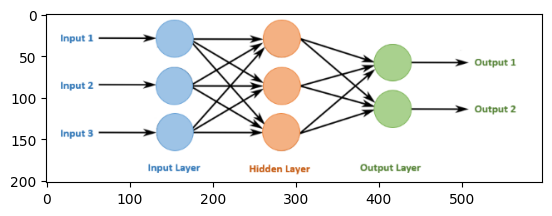

In [2]:
img = mpimg.imread('./images/neural_net.png')
# Output Images
plt.imshow(img)
plt.show()

### What is the Perceptron ? 

A single-layer perceptron, also called the perceptron, is the oldest simple neural network, created by Frank Rosenblatt in 1958. It represents a single unit of the neural network – pretty much the artificial equivalent of a neuron cell. Though its use has become obsolete as it has been replaced by more modern ‘neurons’, understanding its working is essential to our knowledge because a neural network works the same way. 

**The perceptron consists of 5 parts:**

- Input layer
- Weights
- Summation & Bias
- Activation Function
- Output layer


Let’s understand how the perceptron works through its structure given below:

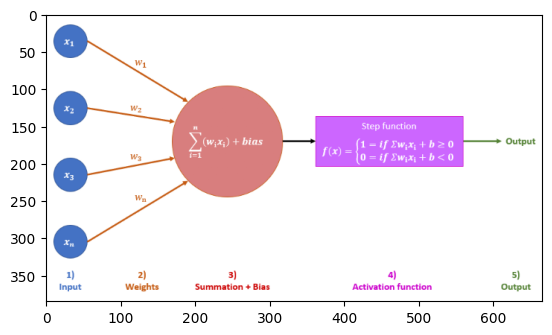

In [3]:
import matplotlib.image as mpimg
img = mpimg.imread('./images/perceptron.png')
img2 = mpimg.imread('./images/bias_calc.png')
# Output Images
plt.imshow(img)
plt.show()

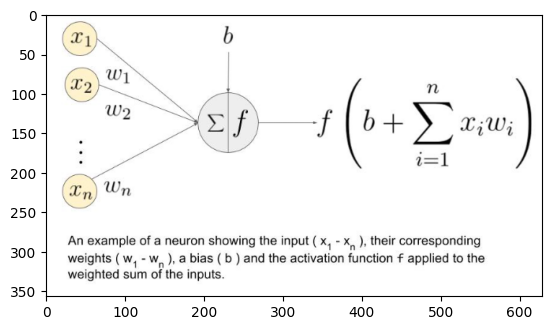

In [4]:
# Output Images
plt.imshow(img2)
plt.show()

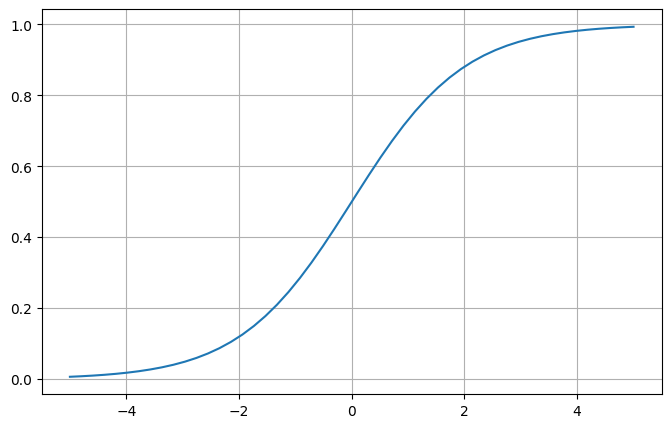

In [5]:
# Sigmoid function in Python
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-5, 5, 50)
z = 1/(1 + np.exp(-x))
plt.subplots(figsize=(8, 5))
plt.plot(x, z)
plt.grid()
plt.show()

### Most Use the Activation Fuction

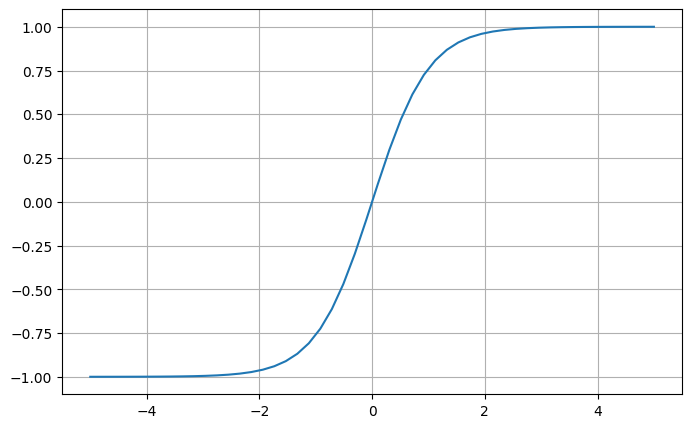

In [6]:
# tanh function in Python
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-5, 5, 50)
z = np.tanh(x)
plt.subplots(figsize=(8, 5))
plt.plot(x, z)
plt.grid()
plt.show()

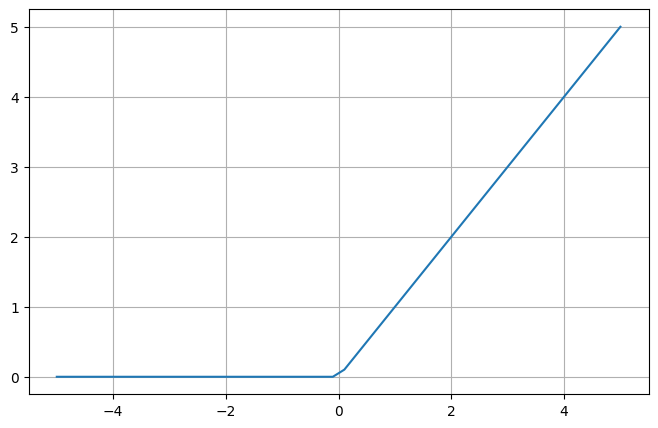

In [7]:
# ReLU in Python
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-5, 5, 50)
z = [max(0, i) for i in x]
plt.subplots(figsize=(8, 5))
plt.plot(x, z)
plt.grid()
plt.show()

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


In [9]:
dataset = pd.read_csv("diabetes.csv")
X = dataset.iloc[:,0:8].values
y = dataset.iloc[:,8].values
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [11]:
print(type(X), type(y))

<class 'torch.Tensor'> <class 'torch.Tensor'>


## Simple ANN Define Model Using Pytorch

In [12]:
# define the model
class PimaClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(8, 12)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(12, 8)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(8, 1)
        self.act_output = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act_output(self.output(x))
        return x

model = PimaClassifier()
print(model)


PimaClassifier(
  (hidden1): Linear(in_features=8, out_features=12, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=12, out_features=8, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [13]:
# make probability predictions with the model
#predictions = model(X)
# round predictions
#rounded = predictions.round()

In [14]:
# make class predictions with the model
#predictions = (model(X) > 0.5).int()

## Train the model

In [15]:
# train the model
loss_fn   = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)
n_epochs = 50
batch_size = 10

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f'Finished epoch {epoch}, latest loss {loss}')


Finished epoch 0, latest loss 1.6578680276870728
Finished epoch 0, latest loss 1.2708548307418823
Finished epoch 0, latest loss 2.1479222774505615
Finished epoch 0, latest loss 1.2874679565429688
Finished epoch 0, latest loss 1.0527291297912598
Finished epoch 0, latest loss 1.3160456418991089
Finished epoch 0, latest loss 0.9020454287528992
Finished epoch 0, latest loss 1.1544729471206665
Finished epoch 0, latest loss 0.5024796724319458
Finished epoch 0, latest loss 0.9446583986282349
Finished epoch 0, latest loss 0.8257234692573547
Finished epoch 0, latest loss 0.7814711332321167
Finished epoch 0, latest loss 0.6804202795028687
Finished epoch 0, latest loss 1.328647494316101
Finished epoch 0, latest loss 0.6249887347221375
Finished epoch 0, latest loss 2.4847819805145264
Finished epoch 0, latest loss 0.7440099716186523
Finished epoch 0, latest loss 1.1854221820831299
Finished epoch 0, latest loss 1.5568740367889404
Finished epoch 0, latest loss 1.1240978240966797
Finished epoch 0, lat

Finished epoch 3, latest loss 0.7503417730331421
Finished epoch 3, latest loss 0.6787479519844055
Finished epoch 3, latest loss 0.6171637773513794
Finished epoch 3, latest loss 0.6996790170669556
Finished epoch 3, latest loss 0.5348016023635864
Finished epoch 3, latest loss 0.4852212071418762
Finished epoch 3, latest loss 0.652882993221283
Finished epoch 3, latest loss 0.5516225695610046
Finished epoch 3, latest loss 0.9612787365913391
Finished epoch 3, latest loss 0.9827710390090942
Finished epoch 3, latest loss 0.8371108174324036
Finished epoch 3, latest loss 0.6147049069404602
Finished epoch 3, latest loss 0.7637235522270203
Finished epoch 3, latest loss 0.7299860119819641
Finished epoch 3, latest loss 0.5285387635231018
Finished epoch 3, latest loss 0.5407200455665588
Finished epoch 3, latest loss 0.7021478414535522
Finished epoch 3, latest loss 0.6694284677505493
Finished epoch 3, latest loss 0.5376970767974854
Finished epoch 3, latest loss 0.6175835728645325
Finished epoch 3, lat

Finished epoch 6, latest loss 0.5838673114776611
Finished epoch 6, latest loss 0.6432383060455322
Finished epoch 6, latest loss 0.568792462348938
Finished epoch 6, latest loss 0.5593133568763733
Finished epoch 6, latest loss 0.6854713559150696
Finished epoch 6, latest loss 0.6897571682929993
Finished epoch 6, latest loss 0.5359747409820557
Finished epoch 6, latest loss 0.7482545971870422
Finished epoch 6, latest loss 0.43852463364601135
Finished epoch 6, latest loss 0.40029177069664
Finished epoch 6, latest loss 0.5587692856788635
Finished epoch 6, latest loss 0.5438238978385925
Finished epoch 6, latest loss 1.0056567192077637
Finished epoch 6, latest loss 0.9005063772201538
Finished epoch 6, latest loss 0.8064131736755371
Finished epoch 6, latest loss 0.4764498174190521
Finished epoch 6, latest loss 0.7629840970039368
Finished epoch 6, latest loss 0.8234232664108276
Finished epoch 6, latest loss 0.49086013436317444
Finished epoch 6, latest loss 0.5308194160461426
Finished epoch 6, lat

Finished epoch 8, latest loss 0.6724173426628113
Finished epoch 8, latest loss 0.4027274250984192
Finished epoch 8, latest loss 0.7746478319168091
Finished epoch 8, latest loss 0.6753808259963989
Finished epoch 8, latest loss 0.698851466178894
Finished epoch 8, latest loss 0.558280885219574
Finished epoch 9, latest loss 0.5511427521705627
Finished epoch 9, latest loss 0.6524961590766907
Finished epoch 9, latest loss 0.5299023389816284
Finished epoch 9, latest loss 0.666107177734375
Finished epoch 9, latest loss 0.7505840063095093
Finished epoch 9, latest loss 0.5736028552055359
Finished epoch 9, latest loss 0.6315096616744995
Finished epoch 9, latest loss 0.5477026700973511
Finished epoch 9, latest loss 0.6108201146125793
Finished epoch 9, latest loss 0.6605532765388489
Finished epoch 9, latest loss 0.6930778622627258
Finished epoch 9, latest loss 0.5268241167068481
Finished epoch 9, latest loss 0.7958531975746155
Finished epoch 9, latest loss 0.38983041048049927
Finished epoch 9, late

Finished epoch 11, latest loss 0.5283774137496948
Finished epoch 11, latest loss 0.6829237937927246
Finished epoch 11, latest loss 0.5837994813919067
Finished epoch 11, latest loss 0.841154932975769
Finished epoch 11, latest loss 0.4924939274787903
Finished epoch 11, latest loss 0.559482991695404
Finished epoch 11, latest loss 0.6214520335197449
Finished epoch 11, latest loss 0.7496342658996582
Finished epoch 11, latest loss 0.6486541032791138
Finished epoch 11, latest loss 0.3870895504951477
Finished epoch 11, latest loss 0.7868404388427734
Finished epoch 11, latest loss 0.6840965151786804
Finished epoch 11, latest loss 0.6987985372543335
Finished epoch 11, latest loss 0.5682139992713928
Finished epoch 12, latest loss 0.5385819673538208
Finished epoch 12, latest loss 0.6491129994392395
Finished epoch 12, latest loss 0.49819159507751465
Finished epoch 12, latest loss 0.665574848651886
Finished epoch 12, latest loss 0.749821662902832
Finished epoch 12, latest loss 0.552266538143158
Fini

Finished epoch 14, latest loss 0.5245059132575989
Finished epoch 14, latest loss 0.21079811453819275
Finished epoch 14, latest loss 0.5179725289344788
Finished epoch 14, latest loss 0.6781356334686279
Finished epoch 14, latest loss 0.5887320637702942
Finished epoch 14, latest loss 0.8184487223625183
Finished epoch 14, latest loss 0.49493855237960815
Finished epoch 14, latest loss 0.5610144734382629
Finished epoch 14, latest loss 0.6102801561355591
Finished epoch 14, latest loss 0.7500327229499817
Finished epoch 14, latest loss 0.6590337753295898
Finished epoch 14, latest loss 0.38099414110183716
Finished epoch 14, latest loss 0.7934461832046509
Finished epoch 14, latest loss 0.6841744184494019
Finished epoch 14, latest loss 0.6928139925003052
Finished epoch 14, latest loss 0.5649643540382385
Finished epoch 15, latest loss 0.5344005823135376
Finished epoch 15, latest loss 0.6473084092140198
Finished epoch 15, latest loss 0.4911079406738281
Finished epoch 15, latest loss 0.66647434234619

Finished epoch 17, latest loss 0.20969612896442413
Finished epoch 17, latest loss 0.5130806565284729
Finished epoch 17, latest loss 0.6720478534698486
Finished epoch 17, latest loss 0.5865978002548218
Finished epoch 17, latest loss 0.8110725283622742
Finished epoch 17, latest loss 0.47565072774887085
Finished epoch 17, latest loss 0.553475022315979
Finished epoch 17, latest loss 0.608979344367981
Finished epoch 17, latest loss 0.7336357831954956
Finished epoch 17, latest loss 0.635973334312439
Finished epoch 17, latest loss 0.3794657588005066
Finished epoch 17, latest loss 0.7863470911979675
Finished epoch 17, latest loss 0.6789741516113281
Finished epoch 17, latest loss 0.6909492611885071
Finished epoch 17, latest loss 0.5800248980522156
Finished epoch 18, latest loss 0.5239354372024536
Finished epoch 18, latest loss 0.6416097283363342
Finished epoch 18, latest loss 0.48821982741355896
Finished epoch 18, latest loss 0.6656435132026672
Finished epoch 18, latest loss 0.7382813692092896


Finished epoch 20, latest loss 0.5216930508613586
Finished epoch 20, latest loss 0.2055896818637848
Finished epoch 20, latest loss 0.5077890753746033
Finished epoch 20, latest loss 0.6611757278442383
Finished epoch 20, latest loss 0.5875020623207092
Finished epoch 20, latest loss 0.7970723509788513
Finished epoch 20, latest loss 0.48799777030944824
Finished epoch 20, latest loss 0.5557831525802612
Finished epoch 20, latest loss 0.5968626141548157
Finished epoch 20, latest loss 0.7459077835083008
Finished epoch 20, latest loss 0.647005558013916
Finished epoch 20, latest loss 0.37583157420158386
Finished epoch 20, latest loss 0.7990639209747314
Finished epoch 20, latest loss 0.688304603099823
Finished epoch 20, latest loss 0.6887234449386597
Finished epoch 20, latest loss 0.5732423663139343
Finished epoch 21, latest loss 0.5237923860549927
Finished epoch 21, latest loss 0.6383558511734009
Finished epoch 21, latest loss 0.4883272051811218
Finished epoch 21, latest loss 0.6661615371704102


Finished epoch 23, latest loss 0.5159478783607483
Finished epoch 23, latest loss 0.21412546932697296
Finished epoch 23, latest loss 0.4996958374977112
Finished epoch 23, latest loss 0.6491551399230957
Finished epoch 23, latest loss 0.5844390392303467
Finished epoch 23, latest loss 0.7802659273147583
Finished epoch 23, latest loss 0.469216525554657
Finished epoch 23, latest loss 0.5424239039421082
Finished epoch 23, latest loss 0.5939663648605347
Finished epoch 23, latest loss 0.7310498952865601
Finished epoch 23, latest loss 0.6140345335006714
Finished epoch 23, latest loss 0.3739170432090759
Finished epoch 23, latest loss 0.7876105308532715
Finished epoch 23, latest loss 0.6761693358421326
Finished epoch 23, latest loss 0.6871510148048401
Finished epoch 23, latest loss 0.5765002965927124
Finished epoch 24, latest loss 0.516876220703125
Finished epoch 24, latest loss 0.637556791305542
Finished epoch 24, latest loss 0.4820021688938141
Finished epoch 24, latest loss 0.6635186672210693
Fi

Finished epoch 26, latest loss 0.5099107027053833
Finished epoch 26, latest loss 0.21623477339744568
Finished epoch 26, latest loss 0.49327874183654785
Finished epoch 26, latest loss 0.6361905336380005
Finished epoch 26, latest loss 0.5842400193214417
Finished epoch 26, latest loss 0.7735234498977661
Finished epoch 26, latest loss 0.4818117618560791
Finished epoch 26, latest loss 0.5410141944885254
Finished epoch 26, latest loss 0.5839744210243225
Finished epoch 26, latest loss 0.7600371241569519
Finished epoch 26, latest loss 0.6239384412765503
Finished epoch 26, latest loss 0.36970797181129456
Finished epoch 26, latest loss 0.7974037528038025
Finished epoch 26, latest loss 0.6839888095855713
Finished epoch 26, latest loss 0.6873812079429626
Finished epoch 26, latest loss 0.5675982236862183
Finished epoch 27, latest loss 0.5204464197158813
Finished epoch 27, latest loss 0.639239490032196
Finished epoch 27, latest loss 0.4866552948951721
Finished epoch 27, latest loss 0.659852325916290

Finished epoch 29, latest loss 0.547697901725769
Finished epoch 29, latest loss 0.3330138325691223
Finished epoch 29, latest loss 0.45580124855041504
Finished epoch 29, latest loss 0.6467925310134888
Finished epoch 29, latest loss 0.25795724987983704
Finished epoch 29, latest loss 0.5066431760787964
Finished epoch 29, latest loss 0.5325141549110413
Finished epoch 29, latest loss 0.6517025232315063
Finished epoch 29, latest loss 0.7918335199356079
Finished epoch 29, latest loss 0.4793155789375305
Finished epoch 29, latest loss 0.5040543675422668
Finished epoch 29, latest loss 0.21884648501873016
Finished epoch 29, latest loss 0.48845046758651733
Finished epoch 29, latest loss 0.6264485716819763
Finished epoch 29, latest loss 0.5879194736480713
Finished epoch 29, latest loss 0.7564436793327332
Finished epoch 29, latest loss 0.4607415199279785
Finished epoch 29, latest loss 0.5307722687721252
Finished epoch 29, latest loss 0.5873739719390869
Finished epoch 29, latest loss 0.75260770320892

Finished epoch 32, latest loss 0.2654675841331482
Finished epoch 32, latest loss 0.5102043747901917
Finished epoch 32, latest loss 0.519036054611206
Finished epoch 32, latest loss 0.7375856041908264
Finished epoch 32, latest loss 0.7756718397140503
Finished epoch 32, latest loss 0.4765261113643646
Finished epoch 32, latest loss 0.49999570846557617
Finished epoch 32, latest loss 0.21899433434009552
Finished epoch 32, latest loss 0.48455530405044556
Finished epoch 32, latest loss 0.6117199659347534
Finished epoch 32, latest loss 0.5874252319335938
Finished epoch 32, latest loss 0.7558159828186035
Finished epoch 32, latest loss 0.4687446653842926
Finished epoch 32, latest loss 0.5297182202339172
Finished epoch 32, latest loss 0.578960120677948
Finished epoch 32, latest loss 0.7714201211929321
Finished epoch 32, latest loss 0.6008347272872925
Finished epoch 32, latest loss 0.3620307147502899
Finished epoch 32, latest loss 0.7900794148445129
Finished epoch 32, latest loss 0.6778483986854553

Finished epoch 35, latest loss 0.5399602651596069
Finished epoch 35, latest loss 0.3210028409957886
Finished epoch 35, latest loss 0.43592411279678345
Finished epoch 35, latest loss 0.6257680654525757
Finished epoch 35, latest loss 0.26779332756996155
Finished epoch 35, latest loss 0.5060110688209534
Finished epoch 35, latest loss 0.5039979815483093
Finished epoch 35, latest loss 0.6359318494796753
Finished epoch 35, latest loss 0.7699151039123535
Finished epoch 35, latest loss 0.4725668430328369
Finished epoch 35, latest loss 0.49493569135665894
Finished epoch 35, latest loss 0.21569328010082245
Finished epoch 35, latest loss 0.4849816858768463
Finished epoch 35, latest loss 0.6148296594619751
Finished epoch 35, latest loss 0.5863615870475769
Finished epoch 35, latest loss 0.7449016571044922
Finished epoch 35, latest loss 0.4498349130153656
Finished epoch 35, latest loss 0.519400954246521
Finished epoch 35, latest loss 0.5875208973884583
Finished epoch 35, latest loss 0.77635014057159

Finished epoch 38, latest loss 0.608527421951294
Finished epoch 38, latest loss 0.5510757565498352
Finished epoch 38, latest loss 0.43333593010902405
Finished epoch 38, latest loss 0.39028945565223694
Finished epoch 38, latest loss 0.5353313088417053
Finished epoch 38, latest loss 0.3157976269721985
Finished epoch 38, latest loss 0.4283890724182129
Finished epoch 38, latest loss 0.6195908784866333
Finished epoch 38, latest loss 0.26250213384628296
Finished epoch 38, latest loss 0.5058045387268066
Finished epoch 38, latest loss 0.4941738247871399
Finished epoch 38, latest loss 0.6335080862045288
Finished epoch 38, latest loss 0.7555948495864868
Finished epoch 38, latest loss 0.4655454158782959
Finished epoch 38, latest loss 0.4891871511936188
Finished epoch 38, latest loss 0.2178354561328888
Finished epoch 38, latest loss 0.48577842116355896
Finished epoch 38, latest loss 0.6015881299972534
Finished epoch 38, latest loss 0.5912250280380249
Finished epoch 38, latest loss 0.74002301692962

Finished epoch 41, latest loss 0.3991544842720032
Finished epoch 41, latest loss 0.5287400484085083
Finished epoch 41, latest loss 0.3137044906616211
Finished epoch 41, latest loss 0.41797924041748047
Finished epoch 41, latest loss 0.6062212586402893
Finished epoch 41, latest loss 0.2645726799964905
Finished epoch 41, latest loss 0.5105554461479187
Finished epoch 41, latest loss 0.4810195863246918
Finished epoch 41, latest loss 0.7295687794685364
Finished epoch 41, latest loss 0.7465770840644836
Finished epoch 41, latest loss 0.4569806456565857
Finished epoch 41, latest loss 0.4759593904018402
Finished epoch 41, latest loss 0.21765956282615662
Finished epoch 41, latest loss 0.4860242009162903
Finished epoch 41, latest loss 0.5897325873374939
Finished epoch 41, latest loss 0.5889959335327148
Finished epoch 41, latest loss 0.7331947684288025
Finished epoch 41, latest loss 0.46695375442504883
Finished epoch 41, latest loss 0.5097911953926086
Finished epoch 41, latest loss 0.56295228004455

Finished epoch 44, latest loss 0.5268296003341675
Finished epoch 44, latest loss 0.3063092827796936
Finished epoch 44, latest loss 0.4142071306705475
Finished epoch 44, latest loss 0.5979296565055847
Finished epoch 44, latest loss 0.2628559172153473
Finished epoch 44, latest loss 0.5099149942398071
Finished epoch 44, latest loss 0.4770938754081726
Finished epoch 44, latest loss 0.5839900374412537
Finished epoch 44, latest loss 0.7442191243171692
Finished epoch 44, latest loss 0.4541921615600586
Finished epoch 44, latest loss 0.48384538292884827
Finished epoch 44, latest loss 0.20780232548713684
Finished epoch 44, latest loss 0.4913354814052582
Finished epoch 44, latest loss 0.5881105661392212
Finished epoch 44, latest loss 0.5992130041122437
Finished epoch 44, latest loss 0.7350723743438721
Finished epoch 44, latest loss 0.44373640418052673
Finished epoch 44, latest loss 0.5016354322433472
Finished epoch 44, latest loss 0.5837262868881226
Finished epoch 44, latest loss 0.79519361257553

Finished epoch 47, latest loss 0.3845670521259308
Finished epoch 47, latest loss 0.523883581161499
Finished epoch 47, latest loss 0.3005169928073883
Finished epoch 47, latest loss 0.40451064705848694
Finished epoch 47, latest loss 0.5898262858390808
Finished epoch 47, latest loss 0.25800052285194397
Finished epoch 47, latest loss 0.509886622428894
Finished epoch 47, latest loss 0.47084981203079224
Finished epoch 47, latest loss 0.62004554271698
Finished epoch 47, latest loss 0.7324803471565247
Finished epoch 47, latest loss 0.44137611985206604
Finished epoch 47, latest loss 0.4670143127441406
Finished epoch 47, latest loss 0.2145722359418869
Finished epoch 47, latest loss 0.4912019371986389
Finished epoch 47, latest loss 0.5755840539932251
Finished epoch 47, latest loss 0.5935985445976257
Finished epoch 47, latest loss 0.7296911478042603
Finished epoch 47, latest loss 0.4526809751987457
Finished epoch 47, latest loss 0.497860848903656
Finished epoch 47, latest loss 0.5669463872909546
F

In [16]:
# compute accuracy
y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy: {accuracy}")

# make class predictions with the model
predictions = (model(X) > 0.5).int()
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

Accuracy: 0.7369791865348816
[6.0, 148.0, 72.0, 35.0, 0.0, 33.599998474121094, 0.6269999742507935, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.600000381469727, 0.35100001096725464, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.299999237060547, 0.671999990940094, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.100000381469727, 0.16699999570846558, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.099998474121094, 2.2880001068115234, 33.0] => 1 (expected 1)


### Using torch utility DataLoader and tensorDataset ANN Model 

- Loading and preparing the data
- Building the ANN model
- Training the model
- Validating the model
- Evaluating model performance

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Loading and preparing the data

In [18]:
# Load diabetes dataset
# diabetes = load_diabetes()
# X = diabetes.data
# y = diabetes.target
dataset = pd.read_csv("diabetes.csv")
X = dataset.iloc[:,0:8].values
y = dataset.iloc[:,8].values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

## Splitting train, test aand validation data set

In [19]:
# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


### Building the ANN model

In [20]:
class DiabetesANN(nn.Module):
    def __init__(self):
        super(DiabetesANN, self).__init__()
        self.fc1 = nn.Linear(8, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model, define the loss function and the optimizer
model = DiabetesANN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Training the model

In [21]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=25):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')
    return model

In [22]:
# Train the model
model = train_model(model, train_loader, criterion, optimizer, num_epochs=25)

Epoch 1/25, Loss: 0.2238
Epoch 2/25, Loss: 0.1643
Epoch 3/25, Loss: 0.1533
Epoch 4/25, Loss: 0.1473
Epoch 5/25, Loss: 0.1437
Epoch 6/25, Loss: 0.1402
Epoch 7/25, Loss: 0.1375
Epoch 8/25, Loss: 0.1356
Epoch 9/25, Loss: 0.1338
Epoch 10/25, Loss: 0.1310
Epoch 11/25, Loss: 0.1335
Epoch 12/25, Loss: 0.1290
Epoch 13/25, Loss: 0.1257
Epoch 14/25, Loss: 0.1244
Epoch 15/25, Loss: 0.1218
Epoch 16/25, Loss: 0.1210
Epoch 17/25, Loss: 0.1184
Epoch 18/25, Loss: 0.1179
Epoch 19/25, Loss: 0.1149
Epoch 20/25, Loss: 0.1130
Epoch 21/25, Loss: 0.1128
Epoch 22/25, Loss: 0.1100
Epoch 23/25, Loss: 0.1080
Epoch 24/25, Loss: 0.1067
Epoch 25/25, Loss: 0.1067


### Evaluating the model

In [23]:
def evaluate_model(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs.size(0)
    val_loss /= len(val_loader.dataset)
    print(f'Validation Loss: {val_loss:.4f}')
    return val_loss

# Evaluate the model
val_loss = evaluate_model(model, val_loader, criterion)

Validation Loss: 0.1885


## Evaluating model performance

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def compute_metrics(model, val_loader):
    model.eval()
    preds = []
    actuals = []
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            preds.append(outputs.numpy())
            actuals.append(targets.numpy())
    preds = np.concatenate(preds)
    actuals = np.concatenate(actuals)
    mse = mean_squared_error(actuals, preds)
    r2 = r2_score(actuals, preds)
    print(f'MSE: {mse:.4f}, R²: {r2:.4f}')
    return mse, r2

# Compute and print metrics
mse, r2 = compute_metrics(model, val_loader)

MSE: 0.1885, R²: 0.1364


In [25]:
# Test function
def test_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        preds = []
        actuals = []
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)
            preds.append(outputs.numpy())
            actuals.append(targets.numpy())
    test_loss /= len(test_loader.dataset)
    preds = np.concatenate(preds)
    actuals = np.concatenate(actuals)
    return test_loss, preds, actuals

# Test the model
test_loss, preds, actuals = test_model(model, test_loader, criterion)
print(f'Test Loss: {test_loss:.4f}')

# Compute and print metrics for the test data
mse, r2 = mean_squared_error(actuals, preds), r2_score(actuals, preds)
print(f'Test MSE: {mse:.4f}, Test R²: {r2:.4f}')

Test Loss: 0.1955
Test MSE: 0.1955, Test R²: 0.1619
